In [23]:
# import numpy library for special calculations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
# declaring of constant parameters
alpha = 1/10
r_n = 1/3
t = 1/5
beta = 1/20

In [25]:
# defining of function parameters
def alpha_n(n):
    return 1/(n+1)
def P(x,n):
    return np.sin(x)/(n+1)
def Q(x,n):
    return x*np.cos(x)/(n+1)
def U(x,n):
    return x/(4*(n+1))
def V(x,n):
    return x/(2*(n+1))
def T(x,n):
    return x/(2*(n+1))
def S(x,n):
    return np.sin(x)/(n+1)
def F(x,n):
    return x - (1/(3*(n+1)))
def G(x,n):
    return x - (1/(6*(n+1)))
def A(x):
    return x/2
def B(x):
    return 2*x
def C(x):
    return 2*x
def D(x):
    return x/2

In [26]:
# defining initial points
x_0 = 3
y_0 = 5
u = 5
v = 3

In [5]:
#def G_F_rn(x_n,w_n):
    #sol_1 = (-(1-2*x_n-2*w_n) + np.sqrt((1-2*x_n-2*w_n)**2 - (4*2*(2*x_n*w_n-x_n))))/4
    #sol_2 = (-(1-2*x_n-2*w_n) - np.sqrt((1-2*x_n-2*w_n)**2 - (4*2*(2*x_n*w_n-x_n))))/4
    #return min(sol_1,sol_2)

#def G_R_rn(y_n,w_n_prime):
 #   sol_1 = (-(1-4*y_n-2*w_n_prime) + np.sqrt((1-4*y_n-2*w_n_prime)**2 - (4*4*(4*y_n*w_n_prime-y_n))))/8
  #  sol_2 = (-(1-4*y_n-2*w_n_prime) - np.sqrt((1-4*y_n-2*w_n_prime)**2 - (4*4*(4*y_n*w_n_prime-y_n))))/8
   # return min(sol_1,sol_2)

In [27]:
# defining x_n+1 and y_n+1
def x_n_func(alpha,x_n,y_n,n):
    g_n = x_n - beta*U(x_n,n)
    h_n = y_n - beta*V(x_n,n)
    w_n = alpha*g_n + (1-alpha)*T(g_n,n)
    w_n_prime = alpha*h_n + (1-alpha)*S(h_n,n)
    E_n = alpha*w_n + (1-alpha)*F(w_n,n)
    E_n_prime = alpha*w_n_prime + (1-alpha)*G(w_n_prime,n)
    d_n = E_n - beta*C(A(E_n)-B(E_n_prime))
    e_n = d_n - t*(d_n - P(d_n,n))
    x_n1 = alpha_n(n)*u + (1-alpha_n(n))*e_n
    return x_n1
    
def y_n_func(alpha,x_n,y_n,n):
    g_n = x_n - beta*U(x_n,n)
    h_n = y_n - beta*V(x_n,n)
    w_n = alpha*g_n + (1-alpha)*T(g_n,n)
    w_n_prime = alpha*h_n + (1-alpha)*S(h_n,n)
    E_n = alpha*w_n + (1-alpha)*F(w_n,n)
    E_n_prime = alpha*w_n_prime + (1-alpha)*G(w_n_prime,n)
    u_n = E_n_prime - beta*D(B(E_n_prime)-A(E_n))
    v_n = u_n - t*(u_n - Q(u_n,n))
    y_n1 = alpha_n(n)*v + (1-alpha_n(n))*v_n
    return y_n1

In [41]:
#iteration proper
def x_y_loop(alpha,x_n,y_n,n,limit):
    x_y_an = []
    
    i = 1
    while i < limit:
        x_1 = x_n_func(alpha,x_n,y_n,n)
        y_1 = y_n_func(alpha,x_n,y_n,n)
        x_y_an.append((x_1,y_1))
        x_n = x_1
        y_n = y_1
        i += 1
        n += 1

    print("After", i, "iterations, the last 5 (x_n+1, y_n+1) are ", x_y_an[-5:])
    x_y_df = pd.DataFrame(x_y_an, columns=["x_n+1","y_n+1"])
    plt.plot(x_y_df["x_n+1"], label = "x_n+1")
    plt.plot(x_y_df["y_n+1"], label = "y_n+1")
    plt.xlabel("Iterations (n)")
    plt.ylabel("Values - (x_n and y_n)")
    plt.legend()
    plt.title("The plot of " + str(i) + " iterations for alpha(n)=1/(n+1)")
    plt.savefig('Plot for ' + str(i)+ ' iterations.png')

After 10 iterations, the last 5 (x_n+1, y_n+1) are  [(1.1718917414370442, 0.733268194174584), (0.9558487581729198, 0.5987358755190595), (0.806774160868024, 0.5039214408755043), (0.6979317052530902, 0.43440056189912274), (0.6150085036653942, 0.38153528716106083)]


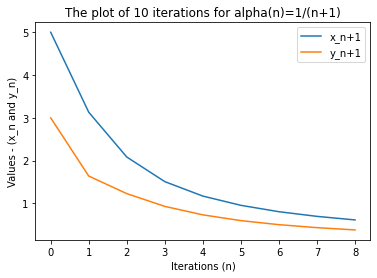

In [42]:
x_y_loop(alpha=alpha,x_n=x_0,y_n=y_0,n=0,limit=10)

After 15 iterations, the last 5 (x_n+1, y_n+1) are  [(0.5497314342892823, 0.34007315488786355), (0.4970044494484632, 0.3067143611937446), (0.4535214380486777, 0.27930569099944064), (0.41704454308035965, 0.25638977960923515), (0.38600492698148237, 0.23694744039456112)]


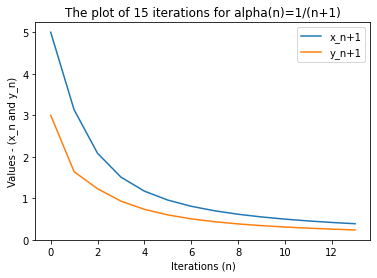

In [43]:
x_y_loop(alpha=alpha,x_n=x_0,y_n=y_0,n=0,limit=15)

After 20 iterations, the last 5 (x_n+1, y_n+1) are  [(0.35927002511240147, 0.22024534044317917), (0.33600165312988595, 0.20574267357039722), (0.31556613328731725, 0.19303200586834451), (0.2974754688168763, 0.18180060956968033), (0.2813477297309075, 0.17180448588541478)]


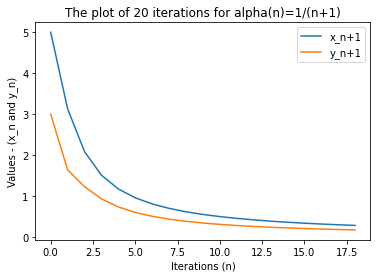

In [44]:
x_y_loop(alpha=alpha,x_n=x_0,y_n=y_0,n=0,limit=20)

After 50 iterations, the last 5 (x_n+1, y_n+1) are  [(0.1167872852633683, 0.07072087127295103), (0.11421817976627685, 0.06915606050546502), (0.11175968234117557, 0.06765900354484808), (0.1094047998682717, 0.06622539291753236), (0.1071471166228013, 0.06485127872400925)]


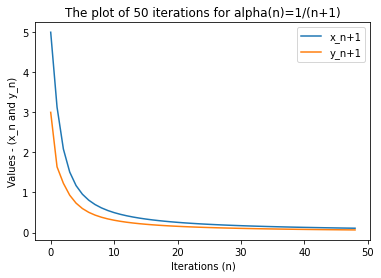

In [45]:
x_y_loop(alpha=alpha,x_n=x_0,y_n=y_0,n=0,limit=50)

After 100 iterations, the last 5 (x_n+1, y_n+1) are  [(0.0549692419621359, 0.033181838987052424), (0.054393423380565444, 0.03283328509576049), (0.053829543706819145, 0.03249197789866436), (0.053277235435037144, 0.03215769372045735), (0.052736145989974635, 0.03183021799748464)]


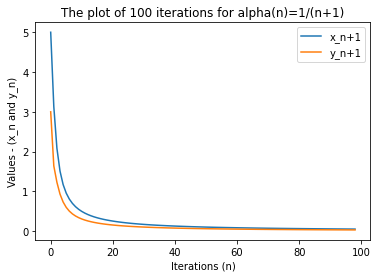

In [46]:
x_y_loop(alpha=alpha,x_n=x_0,y_n=y_0,n=0,limit=100)

After 300 iterations, the last 5 (x_n+1, y_n+1) are  [(0.017634134678029358, 0.010624500175987718), (0.01757445211025771, 0.010588509486908477), (0.017515172170845663, 0.010552761813403463), (0.017456290799186428, 0.010517254702421907), (0.017397803989093342, 0.010481985733817879)]


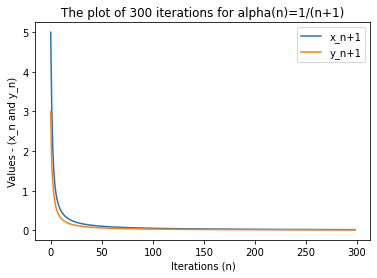

In [47]:
x_y_loop(alpha=alpha,x_n=x_0,y_n=y_0,n=0,limit=300)

After 200 iterations, the last 5 (x_n+1, y_n+1) are  [(0.0267021552492469, 0.016095378256049533), (0.02656554672299835, 0.016012922705020298), (0.02643032887021155, 0.015931307680938447), (0.026296480562764665, 0.015850520396797328), (0.026163981098373035, 0.015770548323655938)]


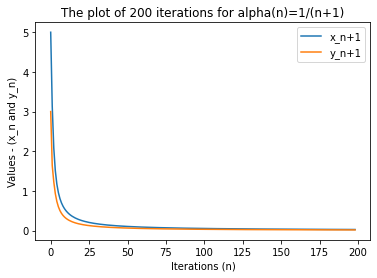

In [48]:
x_y_loop(alpha=alpha,x_n=x_0,y_n=y_0,n=0,limit=200)